In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
df.drop(['month','day'],axis =1 ,inplace = True)

In [5]:
df['size_category'].unique()

array(['small', 'large'], dtype=object)

In [6]:
df['size_category'] = df['size_category'].replace({'small':0,'large':1})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [8]:
df.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609,0.022063
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907,0.034715
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857,0.019428
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877,-0.008726
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006,0.006021
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596,-0.045243
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476,0.059113
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733,0.050001
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573,0.311322
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671,-0.021810


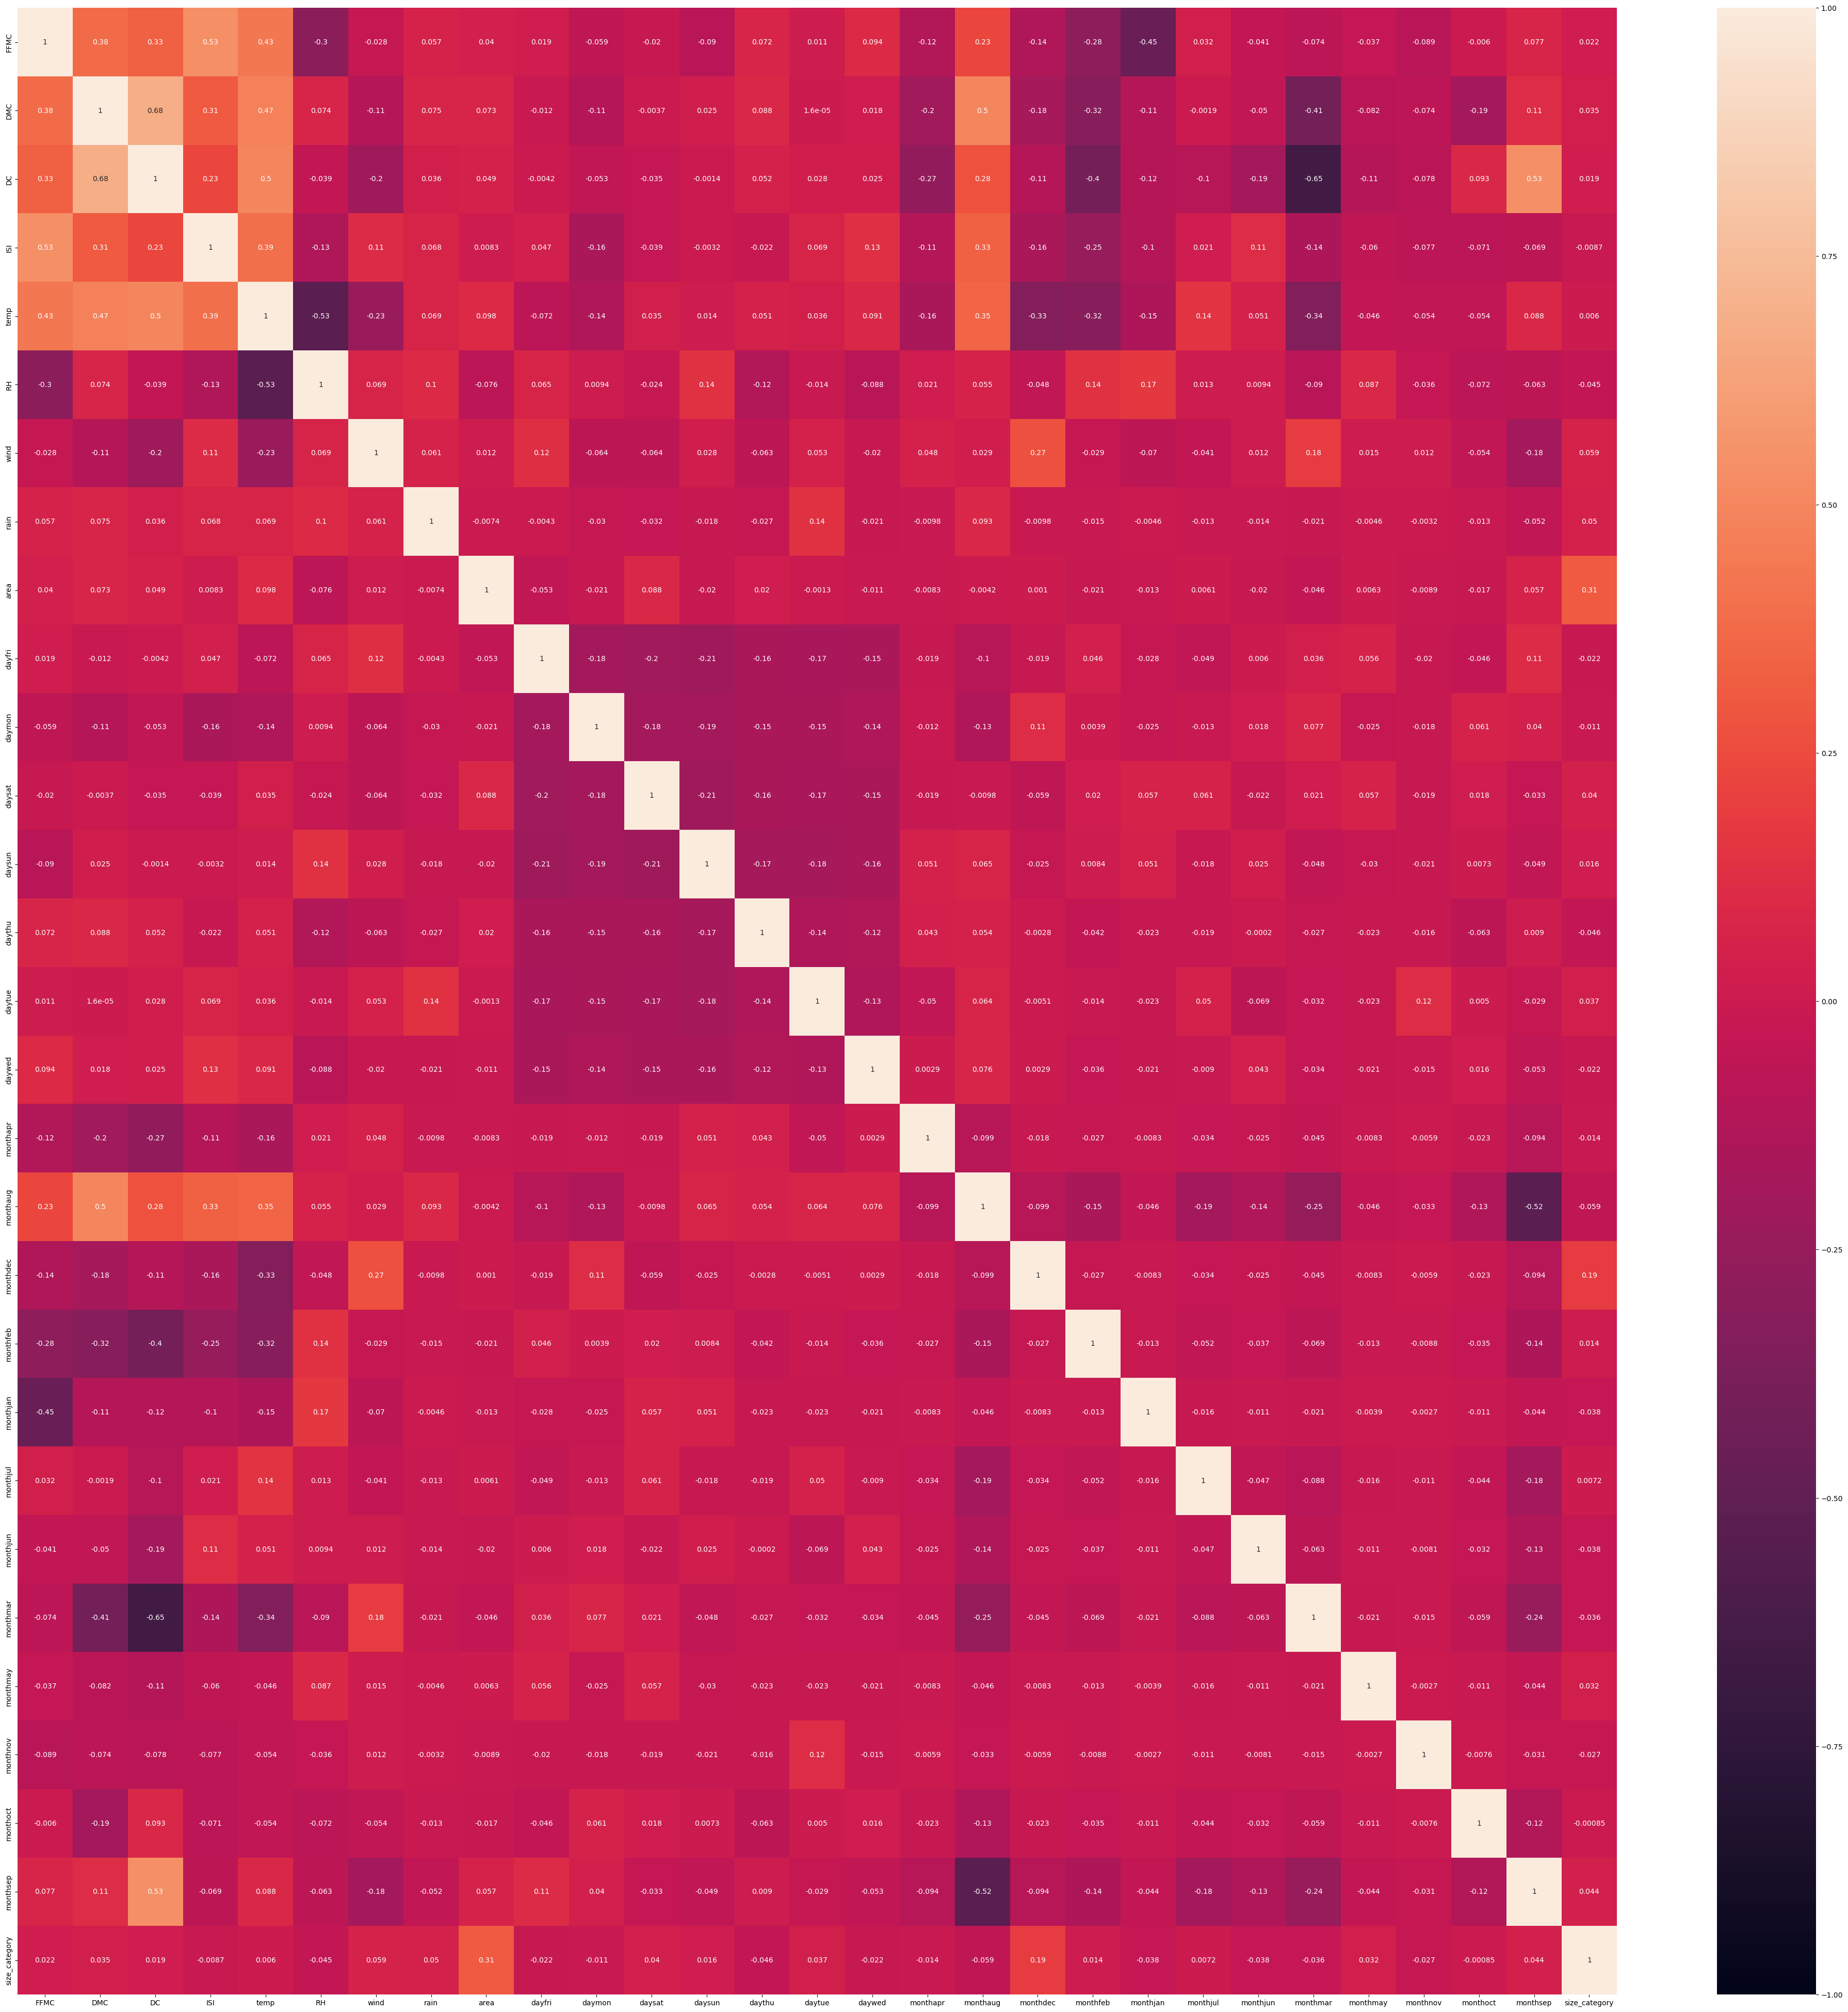

In [9]:
plt.figure(figsize = (50,50))
sns.heatmap(df.corr(),vmin = -1,vmax = 1,annot = True)
plt.show()

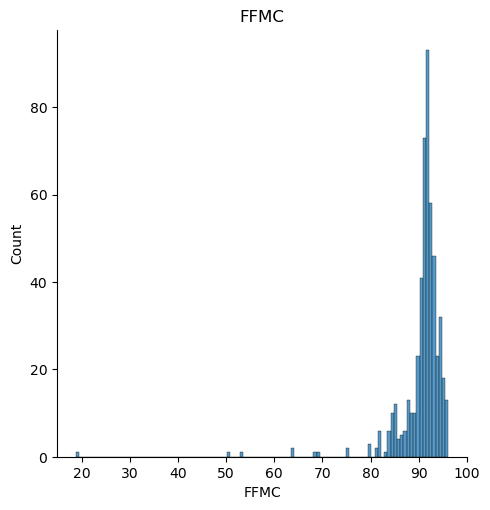

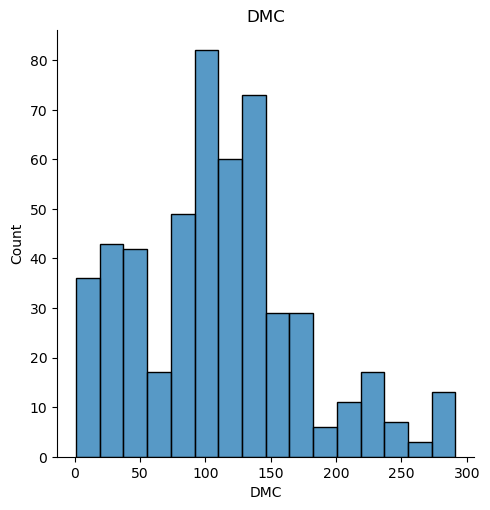

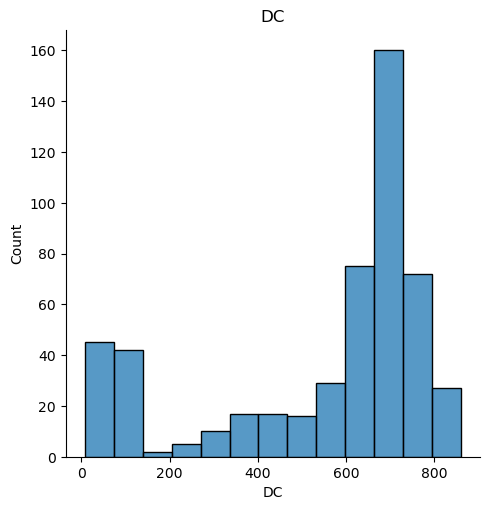

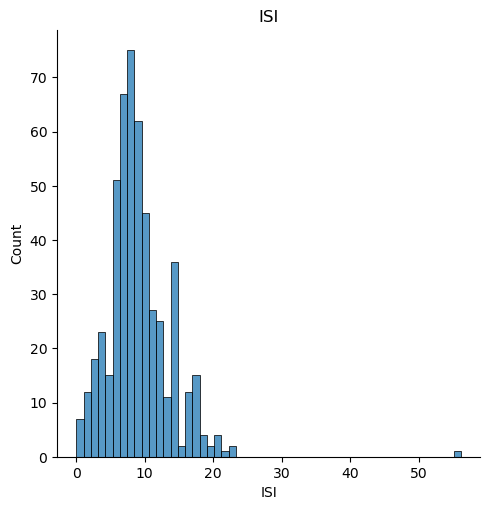

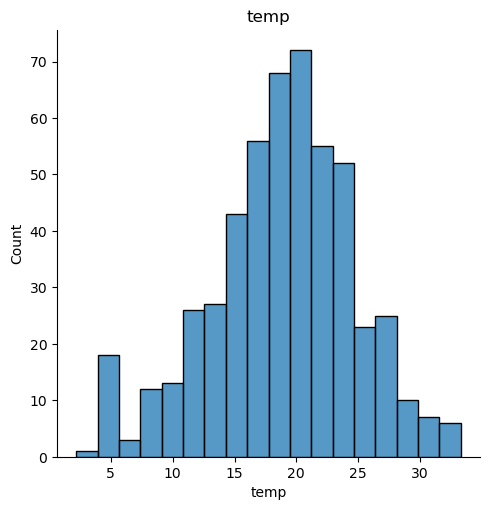

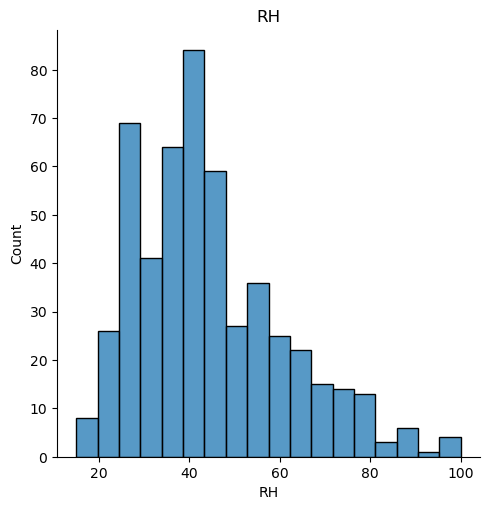

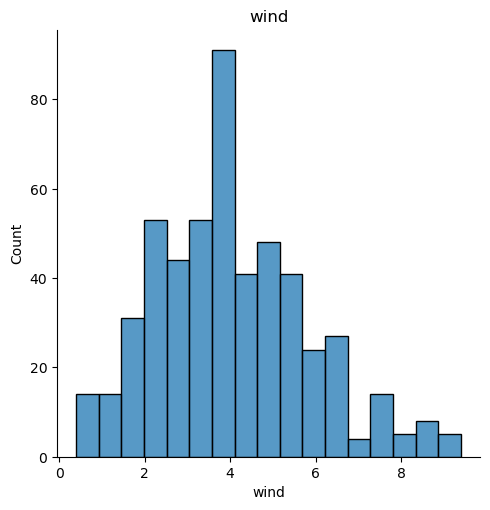

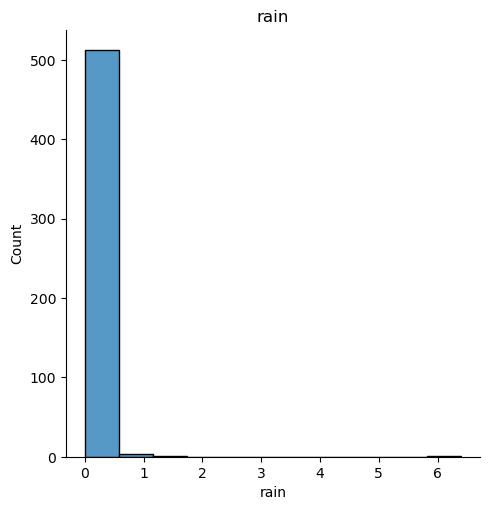

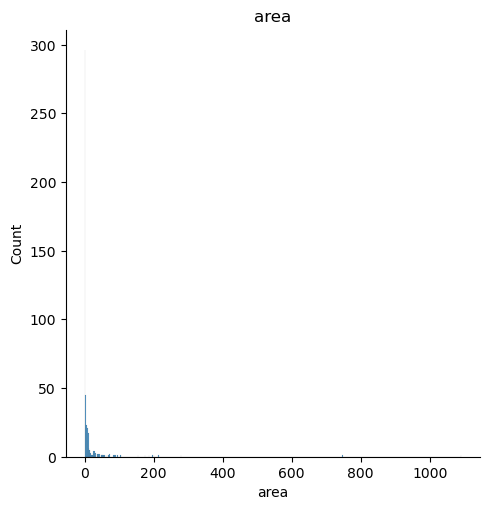

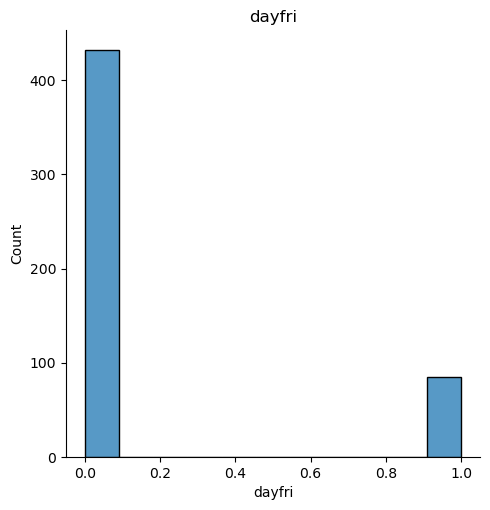

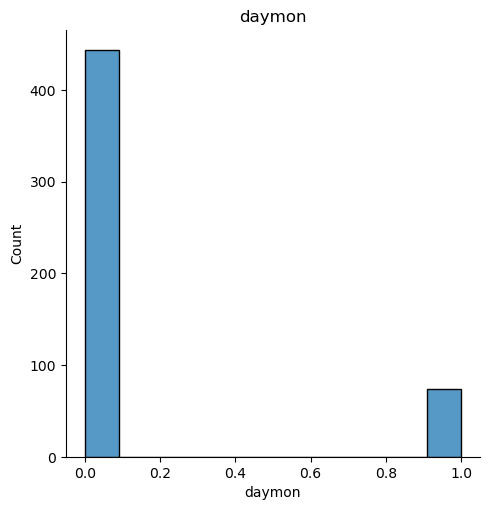

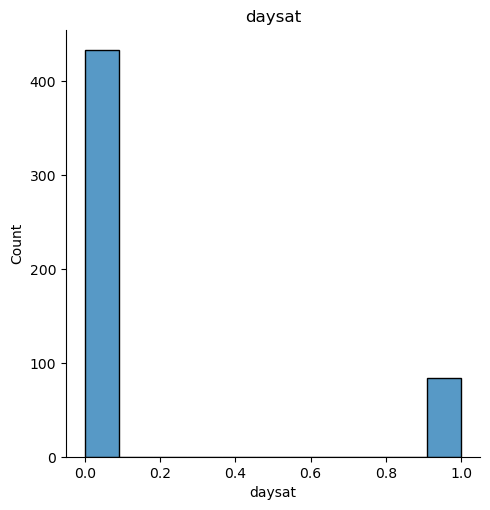

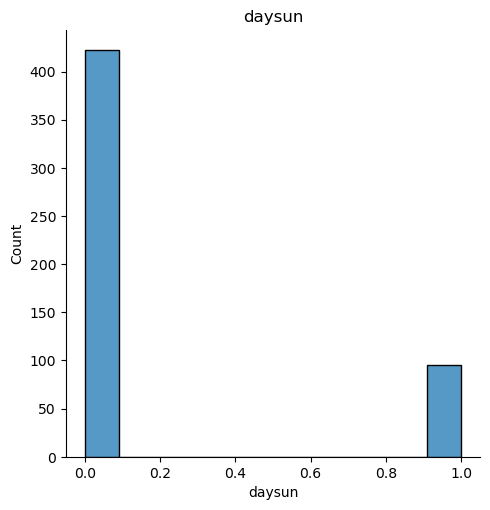

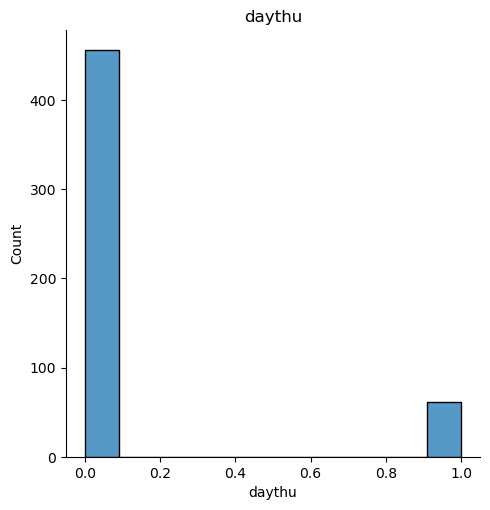

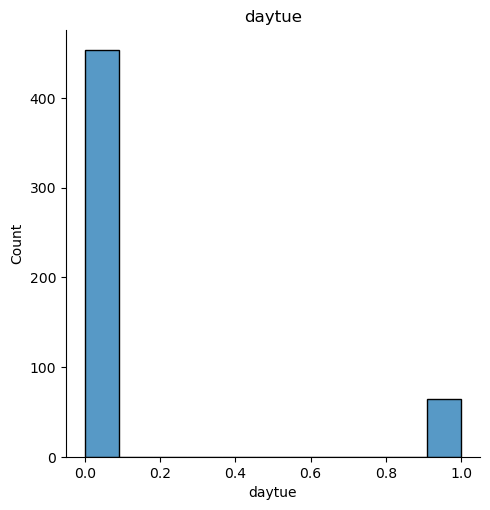

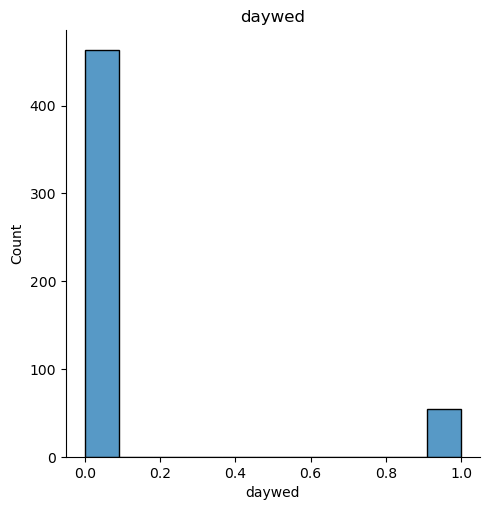

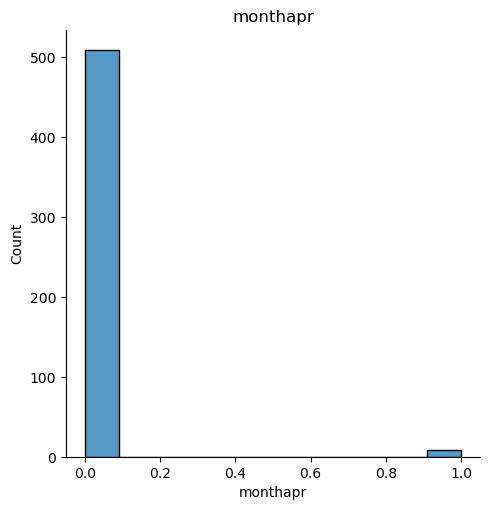

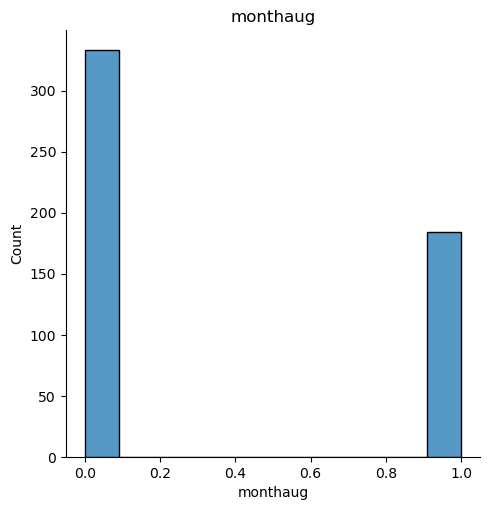

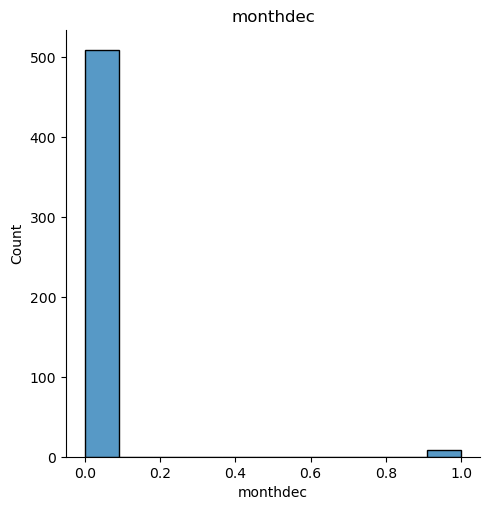

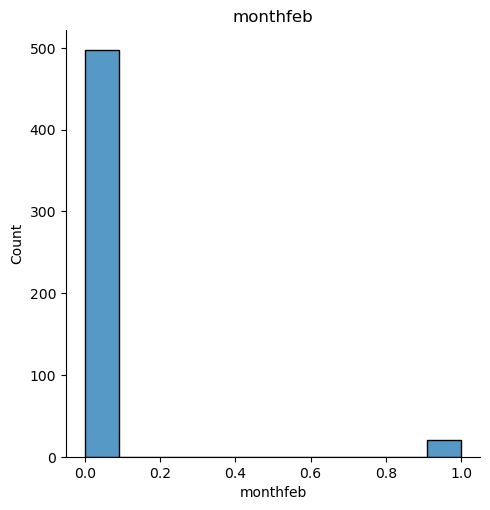

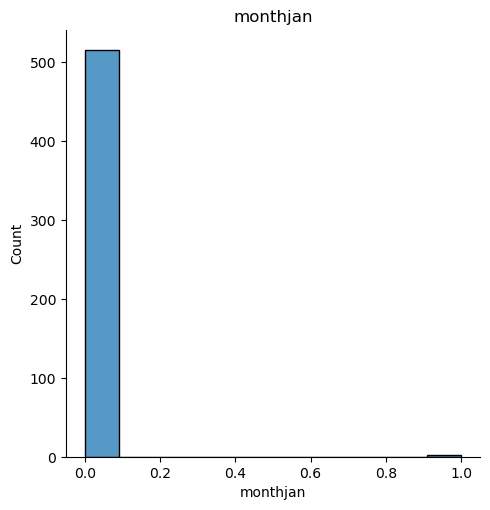

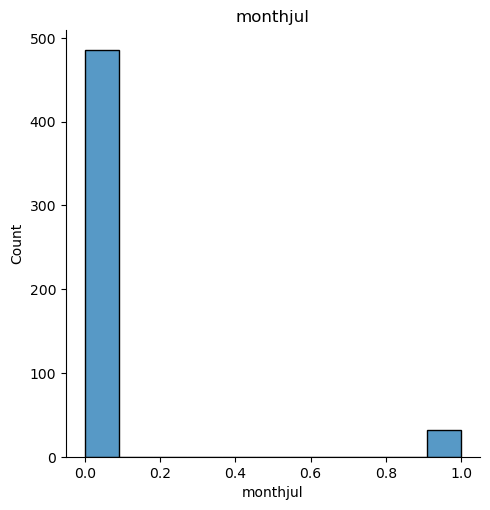

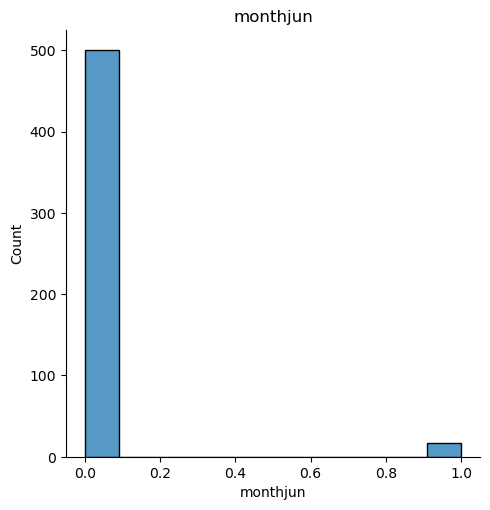

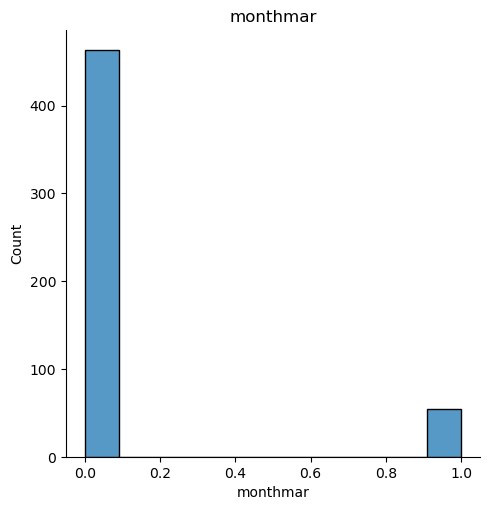

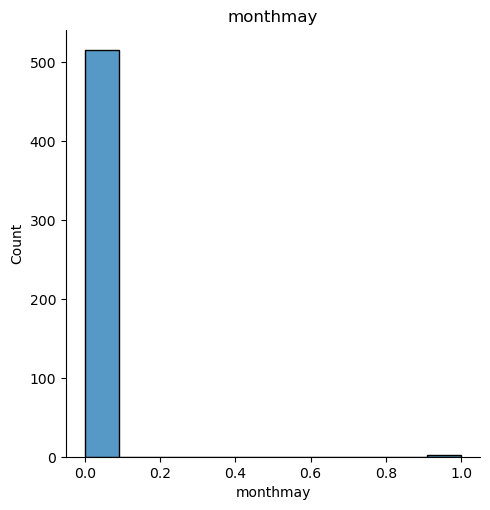

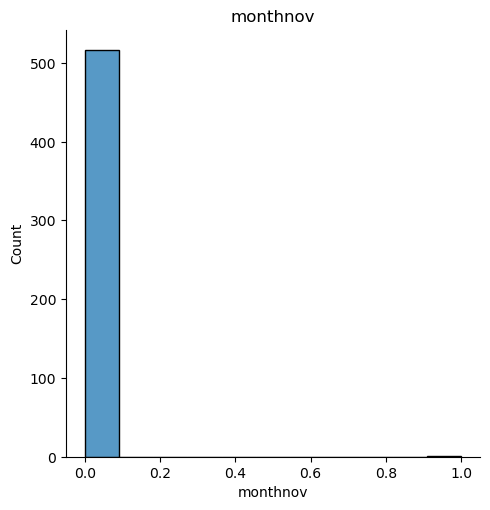

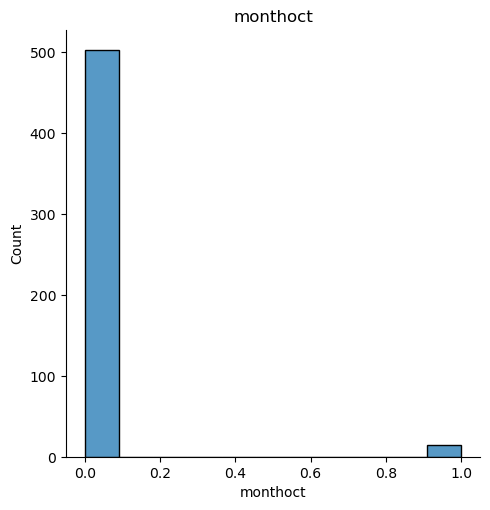

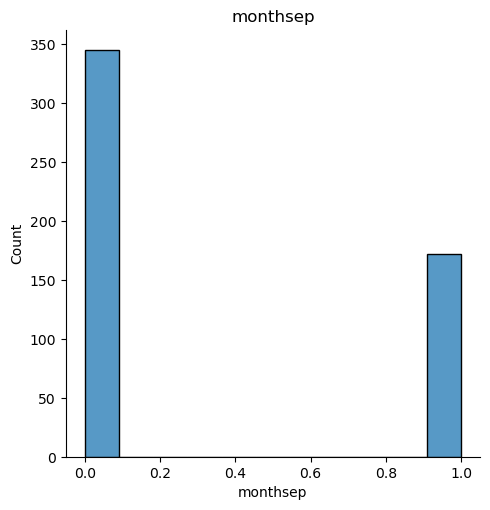

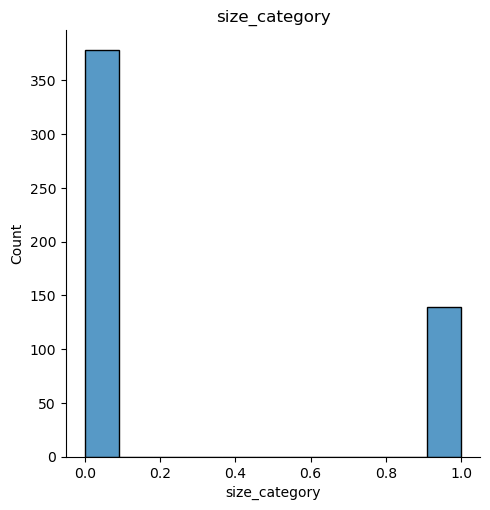

In [10]:
for i in df.columns:
    sns.displot(df[i])
    plt.title(i)
    plt.show()

C:\Users\ygred\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


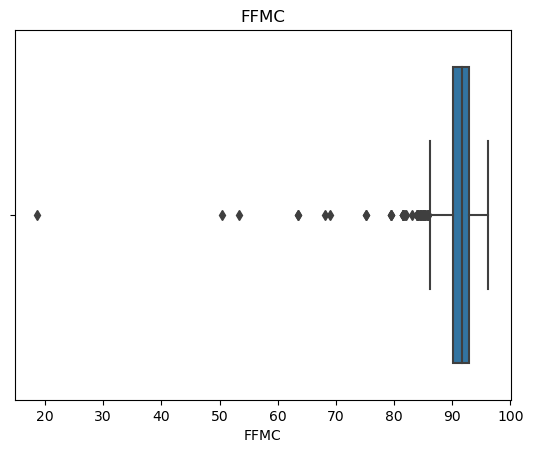

C:\Users\ygred\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


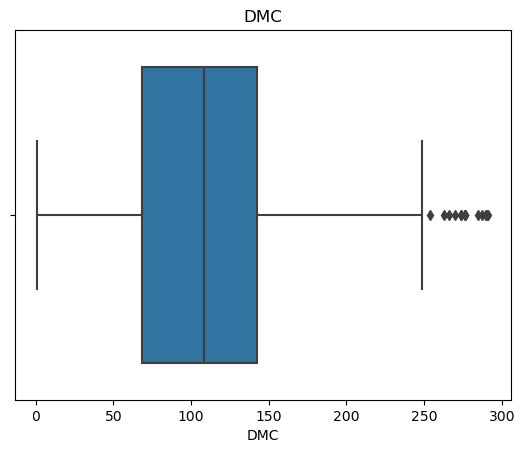

C:\Users\ygred\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


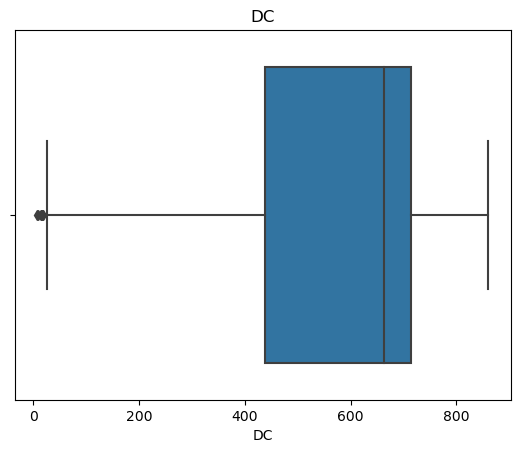

C:\Users\ygred\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


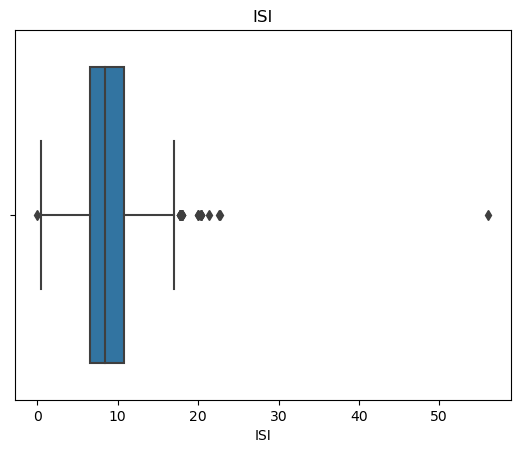

C:\Users\ygred\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


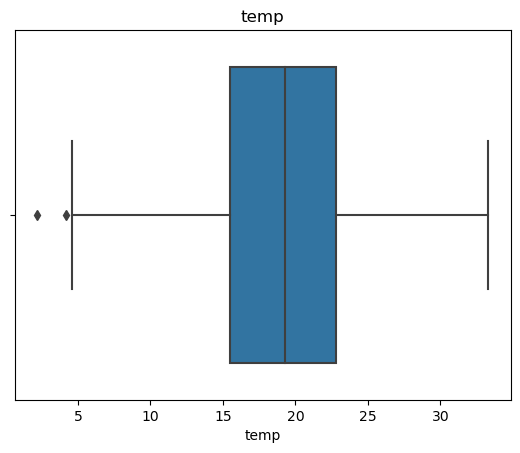

C:\Users\ygred\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


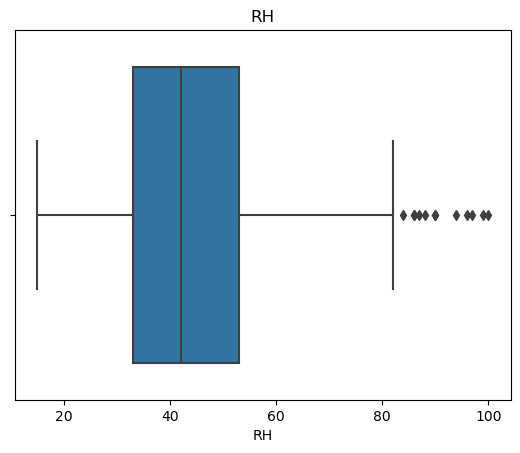

C:\Users\ygred\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


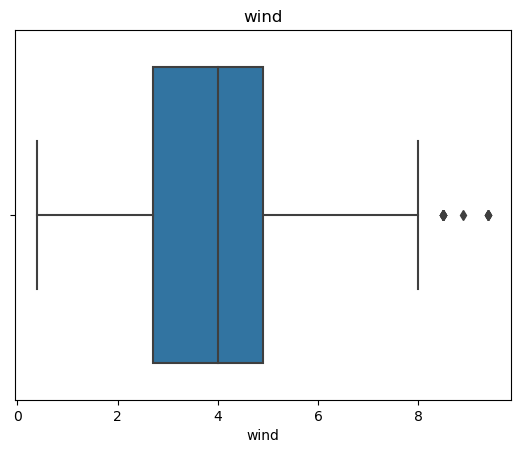

C:\Users\ygred\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


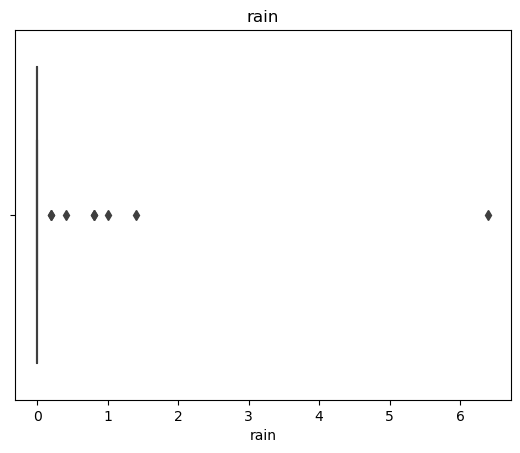

C:\Users\ygred\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


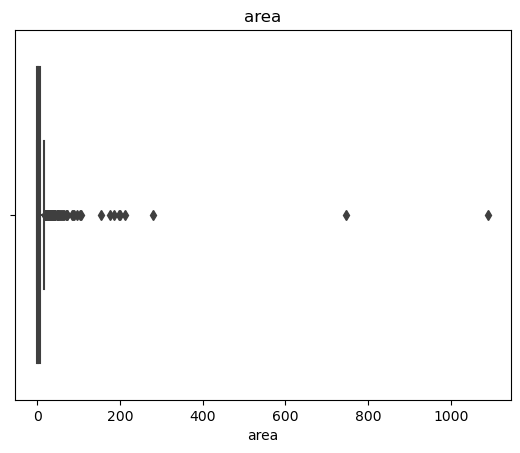

C:\Users\ygred\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


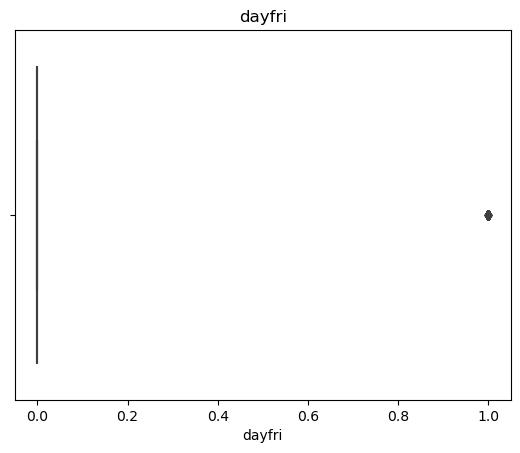

C:\Users\ygred\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


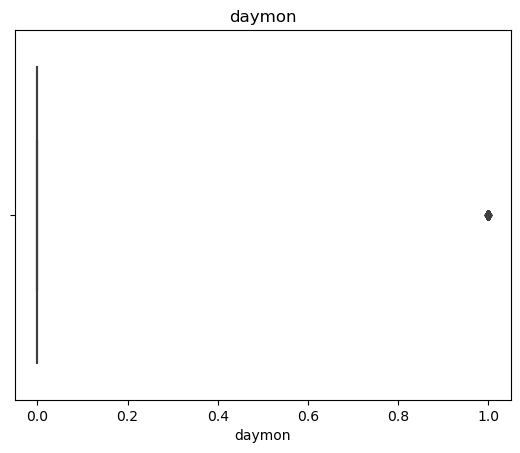

C:\Users\ygred\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


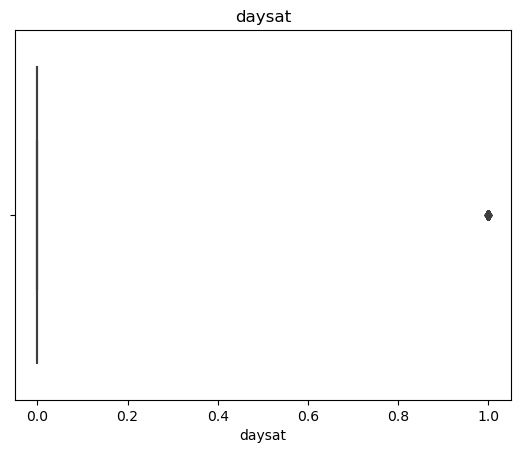

C:\Users\ygred\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


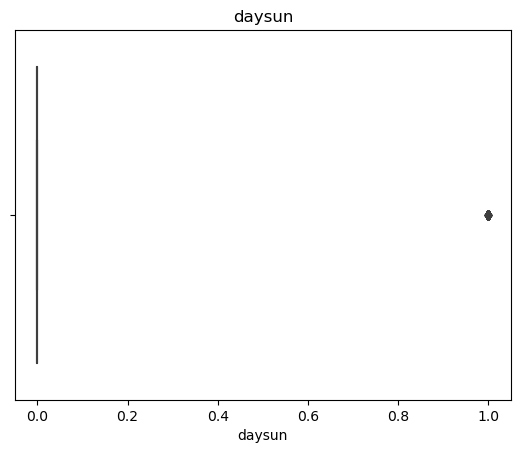

C:\Users\ygred\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


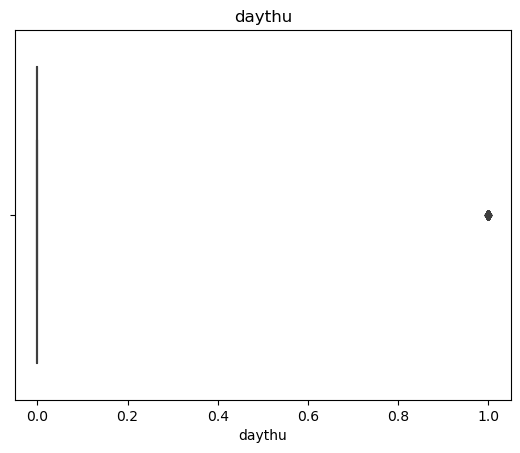

C:\Users\ygred\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


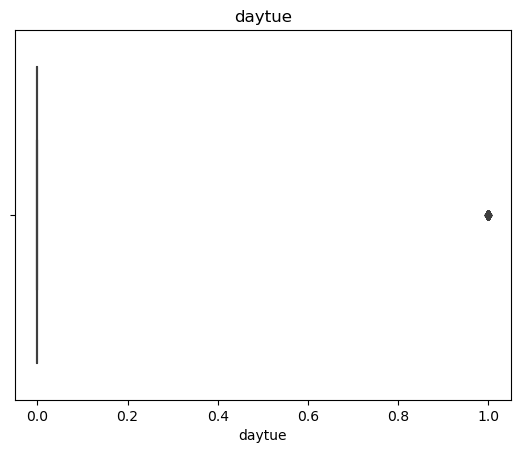

C:\Users\ygred\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


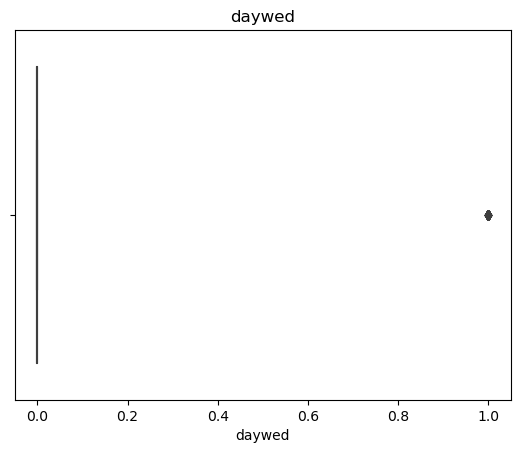

C:\Users\ygred\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


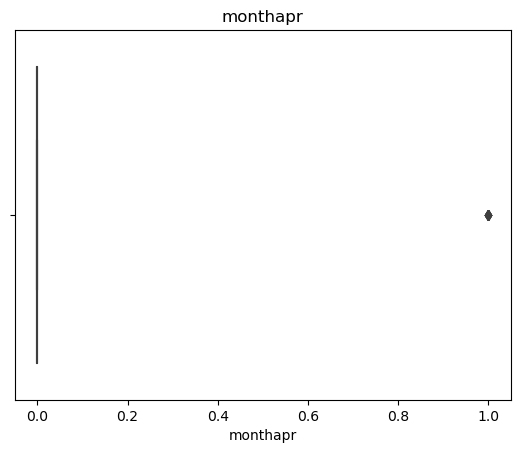

C:\Users\ygred\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


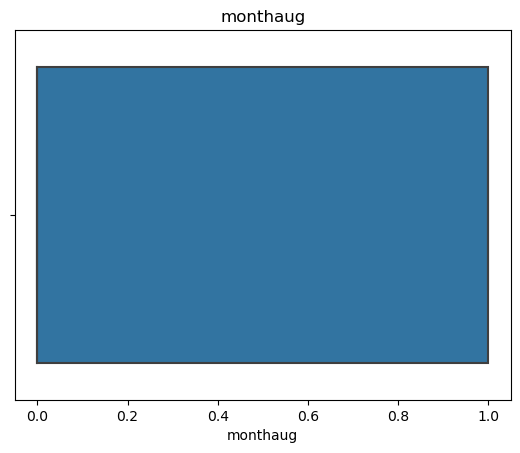

C:\Users\ygred\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


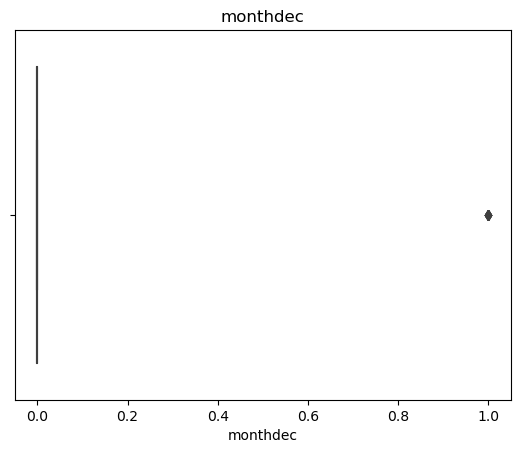

C:\Users\ygred\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


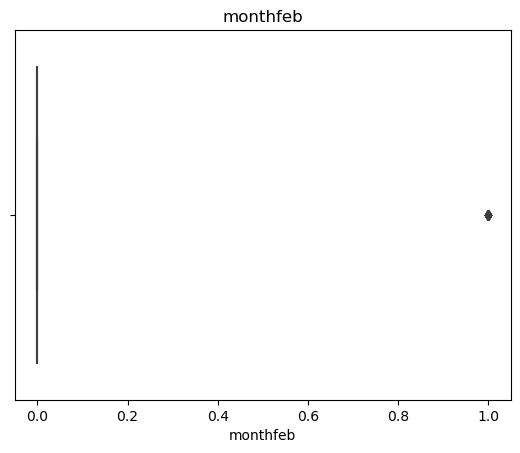

C:\Users\ygred\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


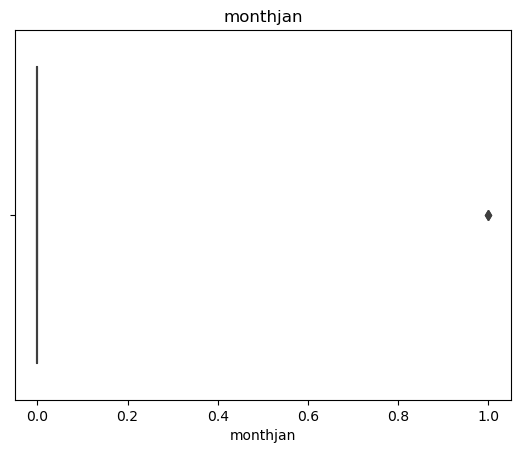

C:\Users\ygred\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


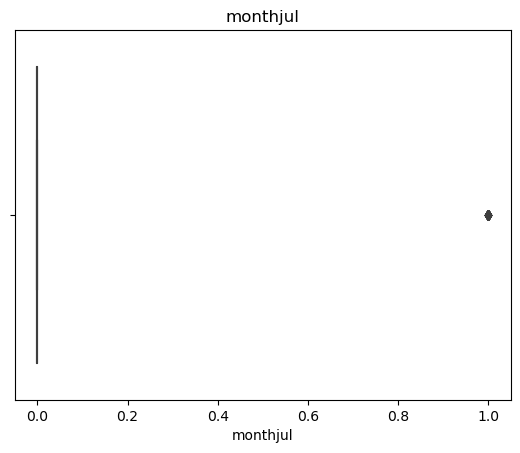

C:\Users\ygred\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


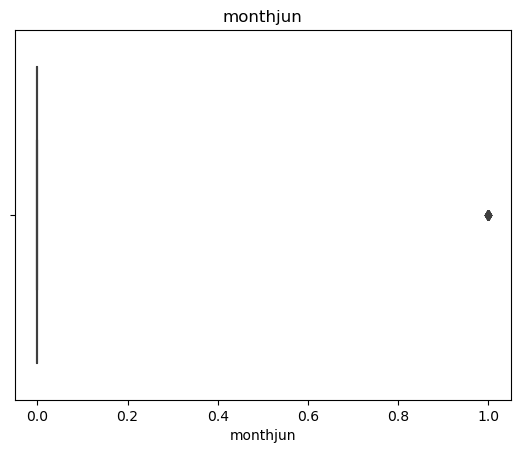

C:\Users\ygred\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


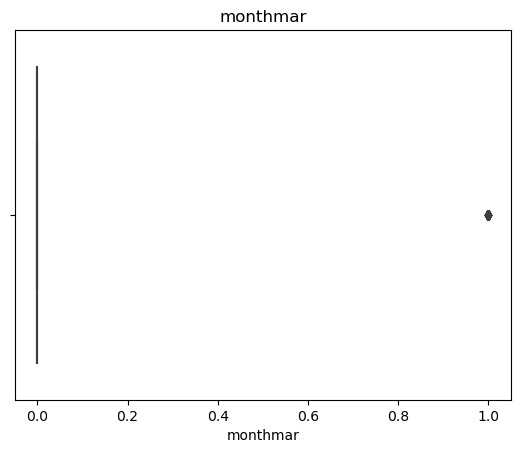

C:\Users\ygred\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


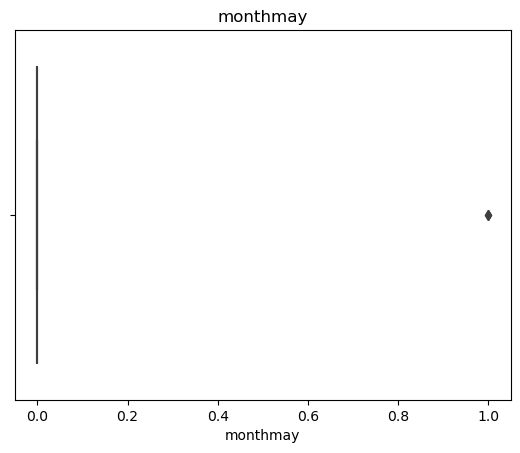

C:\Users\ygred\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


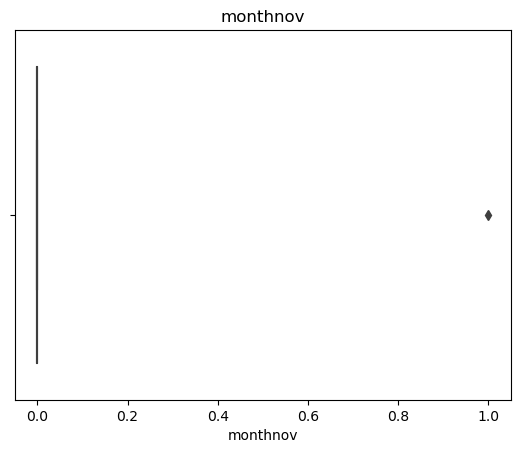

C:\Users\ygred\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


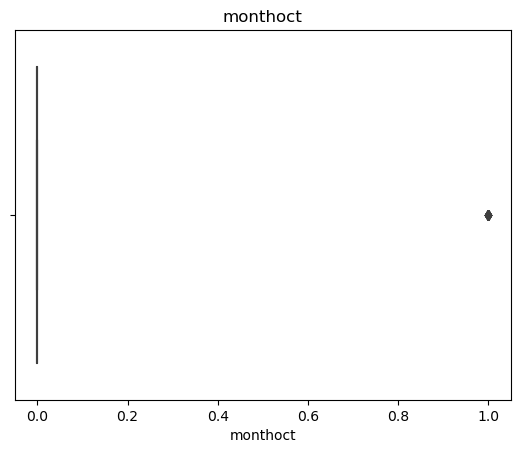

C:\Users\ygred\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


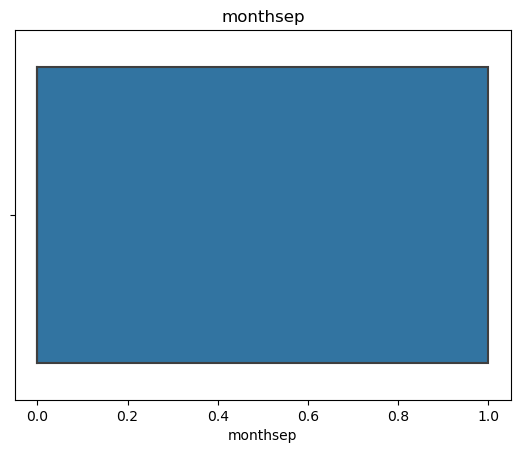

C:\Users\ygred\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


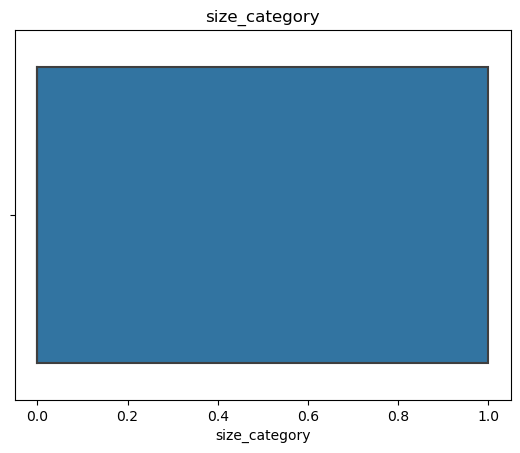

In [11]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

In [12]:
# Extract the columns we'll use for our data

x = df.drop(['size_category'],axis = 1) 
y = df['size_category']

# Split data into our test and training datasets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Logistic Regression 

In [14]:
# Fit (train) the Logistic Regression classifier
logreg_clf = LogisticRegression()
logreg_model = logreg_clf.fit(X_train, Y_train)
logreg_prediction = logreg_clf.predict(X_test)
logreg_train_pred = logreg_clf.predict(X_train)

print("Accuracy {0:.2f}%".format(100*accuracy_score(logreg_train_pred, Y_train)))
print("Accuracy {0:.2f}%".format(100*accuracy_score(logreg_prediction, Y_test)))


# Display the Confusion Matrix and Classification Report 
print(confusion_matrix(logreg_prediction, Y_test))
print(classification_report(logreg_prediction, Y_test))

Accuracy 99.45%
Accuracy 96.79%
[[107   2]
 [  3  44]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       109
           1       0.96      0.94      0.95        47

    accuracy                           0.97       156
   macro avg       0.96      0.96      0.96       156
weighted avg       0.97      0.97      0.97       156



C:\Users\ygred\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest Performance

In [15]:
# Fit (train) the Random Forest classifier
ranfor_clf = RandomForestClassifier()
ranfor_model = ranfor_clf.fit(X_train, Y_train)
ranfor_prediction = ranfor_clf.predict(X_test)
ranfor_train_pred = ranfor_clf.predict(X_train)

print("Accuracy {0:.2f}%".format(100*accuracy_score(ranfor_train_pred, Y_train)))
print("Accuracy {0:.2f}%".format(100*accuracy_score(ranfor_prediction, Y_test)))


# Display the Confusion Matrix and Classification Report 
print(confusion_matrix(ranfor_prediction, Y_test))
print(classification_report(ranfor_prediction, Y_test))

Accuracy 100.00%
Accuracy 99.36%
[[109   0]
 [  1  46]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       109
           1       1.00      0.98      0.99        47

    accuracy                           0.99       156
   macro avg       1.00      0.99      0.99       156
weighted avg       0.99      0.99      0.99       156



# Support vector machine

In [16]:
# Fit (train) the Support Vector Machine classifier
svm_clf = SVC(C=2.0,
    kernel='rbf',
    degree=5,
    gamma='scale',
    coef0=0.1,)
svm_model = svm_clf.fit(X_train, Y_train)
svm_prediction = svm_clf.predict(X_test)
svm_train_pred = svm_clf.predict(X_train)

print("Accuracy {0:.2f}%".format(100*accuracy_score(svm_train_pred, Y_train)))
print("Accuracy {0:.2f}%".format(100*accuracy_score(svm_prediction, Y_test)))


# Display the Confusion Matrix and Classification Report 
print(confusion_matrix(svm_prediction, Y_test))
print(classification_report(svm_prediction, Y_test))

Accuracy 76.45%
Accuracy 75.00%
[[110  39]
 [  0   7]]
              precision    recall  f1-score   support

           0       1.00      0.74      0.85       149
           1       0.15      1.00      0.26         7

    accuracy                           0.75       156
   macro avg       0.58      0.87      0.56       156
weighted avg       0.96      0.75      0.82       156



# Salary Data 

In [17]:
df1 = pd.read_csv('SalaryData_Train(1).csv')
df1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [18]:
df1.shape

(30161, 14)

In [19]:
df2 = pd.read_csv('SalaryData_Test(1).csv')
df2.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [20]:
df2.shape

(15060, 14)

In [21]:
frames = [df1, df2]
df = pd.concat(frames)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45221 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [23]:
df['Salary'].value_counts()

 <=50K    34013
 >50K     11208
Name: Salary, dtype: int64

In [24]:
label_encoding = df.select_dtypes(exclude = ['int','float'])
print(label_encoding.columns)

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')


In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [26]:
for i in label_encoding:
    if i != 'Salary':
        print(i)
        df[i] = le.fit_transform(df[i])

workclass
education
maritalstatus
occupation
relationship
race
sex
native


In [27]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [28]:
df['Salary'].value_counts()

 <=50K    34013
 >50K     11208
Name: Salary, dtype: int64

In [29]:
df['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [30]:
 df['Salary']=df['Salary'].map({' <=50K':1,' >50K':0})

In [31]:
df['Salary'].unique()

array([1, 0], dtype=int64)

In [32]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,1
1,50,4,9,13,2,3,0,4,1,0,0,13,37,1
2,38,2,11,9,0,5,1,4,1,0,0,40,37,1
3,53,2,1,7,2,5,0,2,1,0,0,40,37,1
4,28,2,9,13,2,9,5,2,0,0,0,40,4,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45221 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            45221 non-null  int64
 1   workclass      45221 non-null  int32
 2   education      45221 non-null  int32
 3   educationno    45221 non-null  int64
 4   maritalstatus  45221 non-null  int32
 5   occupation     45221 non-null  int32
 6   relationship   45221 non-null  int32
 7   race           45221 non-null  int32
 8   sex            45221 non-null  int32
 9   capitalgain    45221 non-null  int64
 10  capitalloss    45221 non-null  int64
 11  hoursperweek   45221 non-null  int64
 12  native         45221 non-null  int32
 13  Salary         45221 non-null  int64
dtypes: int32(8), int64(6)
memory usage: 3.8 MB


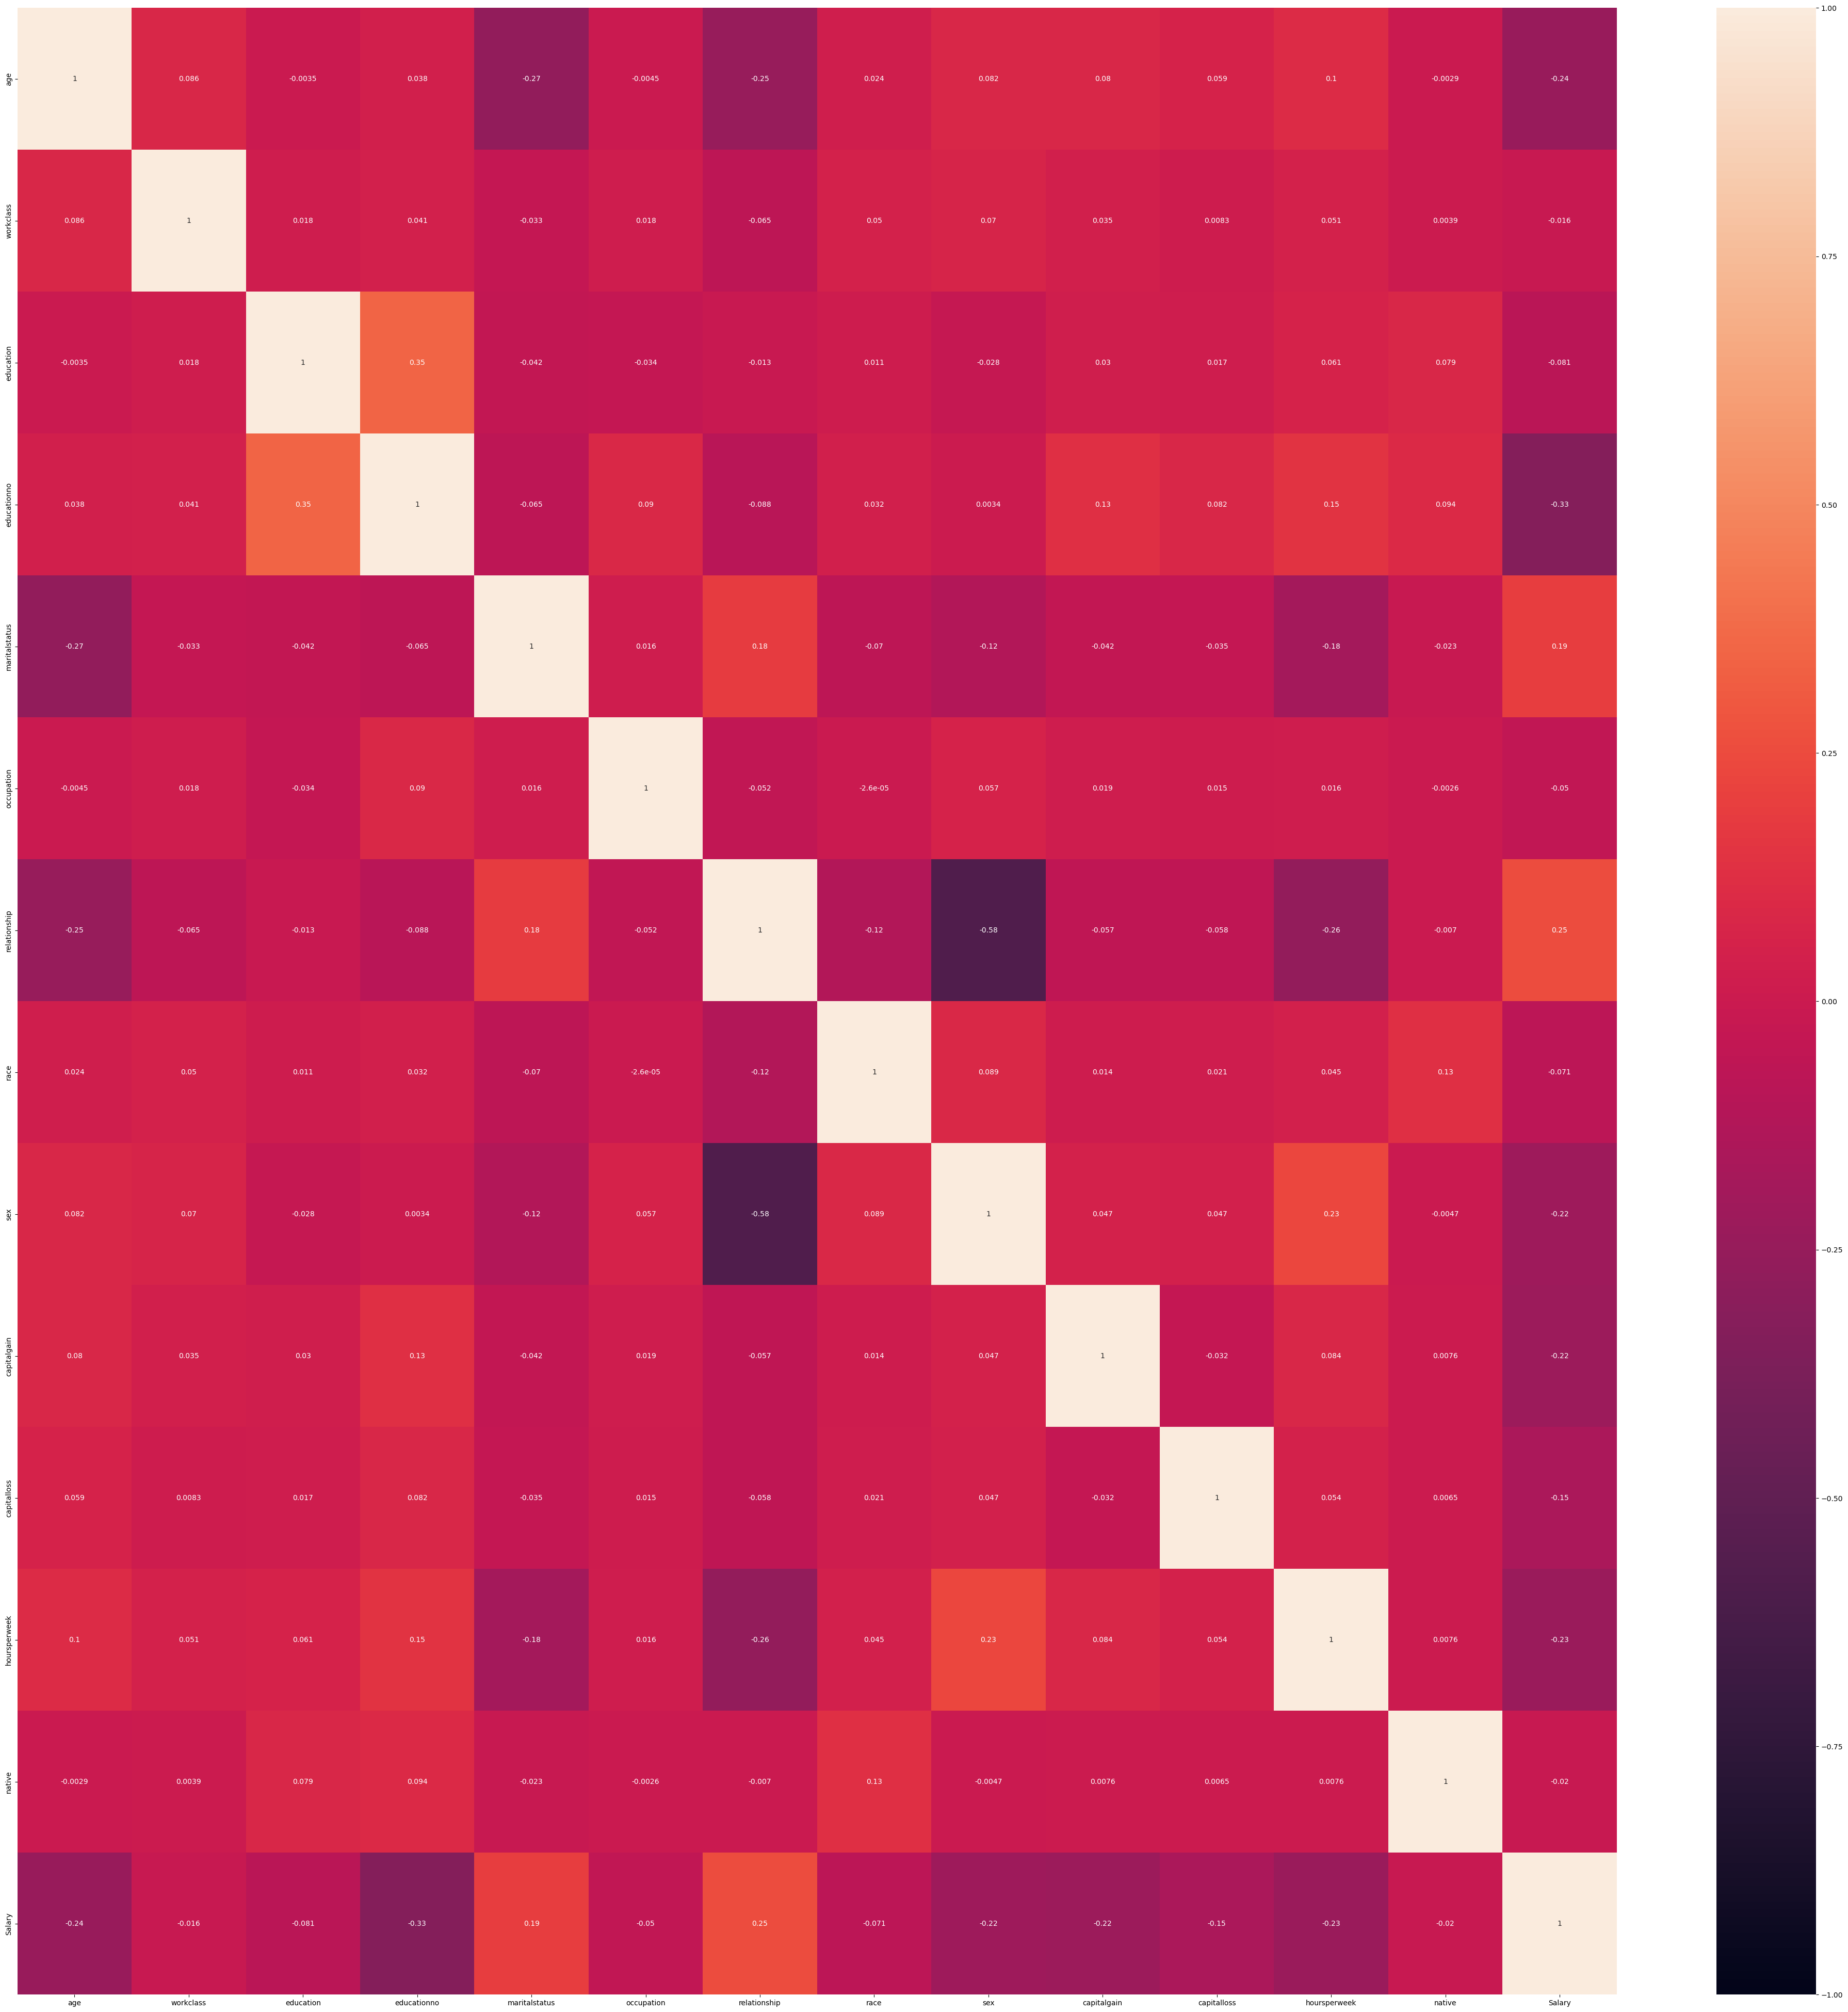

In [34]:
plt.figure(figsize = (50,50))
sns.heatmap(df.corr(),vmin = -1,vmax = 1,annot = True)
plt.show()

# Logistic Regression

In [35]:
# Extract the columns we'll use for our data

x = df.drop(['Salary'],axis = 1) 
y = df['Salary']

# Split data into our test and training datasets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [36]:
logreg_clf = LogisticRegression()
logreg_model = logreg_clf.fit(X_train, Y_train)
logreg_prediction = logreg_clf.predict(X_test)
logreg_train_pred = logreg_clf.predict(X_train)

print("Accuracy {0:.2f}%".format(100*accuracy_score(logreg_train_pred, Y_train)))
print("Accuracy {0:.2f}%".format(100*accuracy_score(logreg_prediction, Y_test)))


# Display the Confusion Matrix and Classification Report 
print(confusion_matrix(logreg_prediction, Y_test))
print(classification_report(logreg_prediction, Y_test))

Accuracy 80.26%
Accuracy 80.24%
[[1264  661]
 [2020 9622]]
              precision    recall  f1-score   support

           0       0.38      0.66      0.49      1925
           1       0.94      0.83      0.88     11642

    accuracy                           0.80     13567
   macro avg       0.66      0.74      0.68     13567
weighted avg       0.86      0.80      0.82     13567



C:\Users\ygred\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest

In [41]:
# Fit (train) the Random Forest classifier
ranfor_clf = RandomForestClassifier(n_estimators=50,max_depth = 5,max_features=7)
ranfor_model = ranfor_clf.fit(X_train, Y_train)
ranfor_prediction = ranfor_clf.predict(X_test)
ranfor_train_pred = ranfor_clf.predict(X_train)

print("Accuracy {0:.2f}%".format(100*accuracy_score(ranfor_train_pred, Y_train)))
print("Accuracy {0:.2f}%".format(100*accuracy_score(ranfor_prediction, Y_test)))


# Display the Confusion Matrix and Classification Report 
print(confusion_matrix(ranfor_prediction, Y_test))
print(classification_report(ranfor_prediction, Y_test))

Accuracy 84.91%
Accuracy 85.14%
[[1746  478]
 [1538 9805]]
              precision    recall  f1-score   support

           0       0.53      0.79      0.63      2224
           1       0.95      0.86      0.91     11343

    accuracy                           0.85     13567
   macro avg       0.74      0.82      0.77     13567
weighted avg       0.88      0.85      0.86     13567



# Support vector Machine

In [38]:
svm_clf = SVC(C=2.0,
    kernel='rbf',
    degree=5,
    gamma='scale',
    coef0=0.1,)
svm_model = svm_clf.fit(X_train, Y_train)
svm_prediction = svm_clf.predict(X_test)
svm_train_pred = svm_clf.predict(X_train)

print("Accuracy {0:.2f}%".format(100*accuracy_score(svm_train_pred, Y_train)))
print("Accuracy {0:.2f}%".format(100*accuracy_score(svm_prediction, Y_test)))


# Display the Confusion Matrix and Classification Report 
print(confusion_matrix(svm_prediction, Y_test))
print(classification_report(svm_prediction, Y_test))

Accuracy 79.48%
Accuracy 79.92%
[[ 892  332]
 [2392 9951]]
              precision    recall  f1-score   support

           0       0.27      0.73      0.40      1224
           1       0.97      0.81      0.88     12343

    accuracy                           0.80     13567
   macro avg       0.62      0.77      0.64     13567
weighted avg       0.90      0.80      0.84     13567

